In [ ]:
import cv2

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return img


In [ ]:
cap = cv2.VideoCapture(0)  # Запуск веб-камеры. 0 - это индекс камеры. Если у вас их несколько, можете попробовать 1, 2 и т. д.

while True:
    ret, frame = cap.read()  # Чтение кадра
    if not ret:
        break
    flipped_frame = cv2.flip(frame, 1)
    flipped_frame = detect_faces(flipped_frame)  # Распознавание лиц
    cv2.imshow('Face Detection', flipped_frame)  # Отображение кадра

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Закрыть окно при нажатии 'q'
        break

cap.release()
cv2.destroyAllWindows()


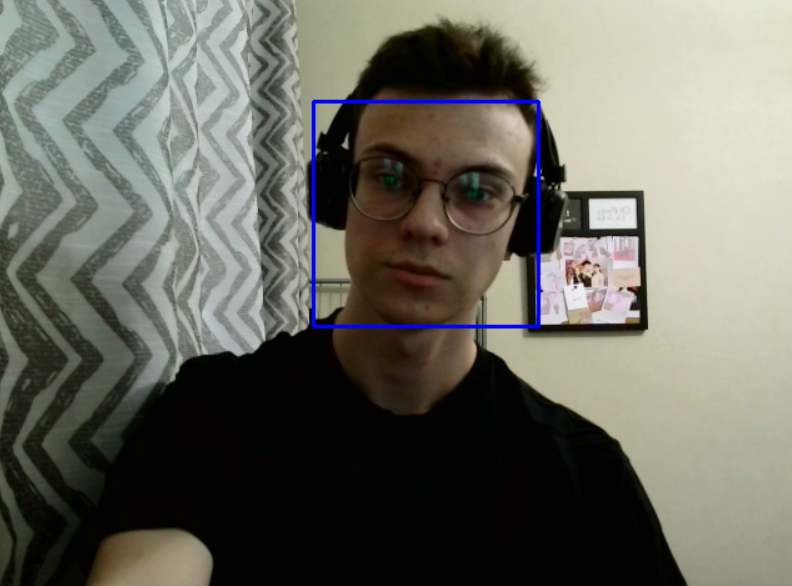

In [ ]:
import face_recognition
import cv2

# Загрузите изображение с известным лицом
known_image = face_recognition.load_image_file("me.jpg")
known_face_encoding = face_recognition.face_encodings(known_image)[0]

# Инициализация веб-камеры
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    flipped_frame = cv2.flip(frame, 1)
    # Ищем лицо на кадре и извлекаем признаки
    face_locations = face_recognition.face_locations(flipped_frame)
    face_encodings = face_recognition.face_encodings(flipped_frame, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces([known_face_encoding], face_encoding)
        name = "Unknown"

        if True in matches:
            name = "Vlad"

        cv2.rectangle(flipped_frame, (left, top), (right, bottom), (255, 0, 255), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(flipped_frame, name, (left + 6, bottom - 6), font, 0.5, (0, 0, 255), 1)

    cv2.imshow('Video', flipped_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


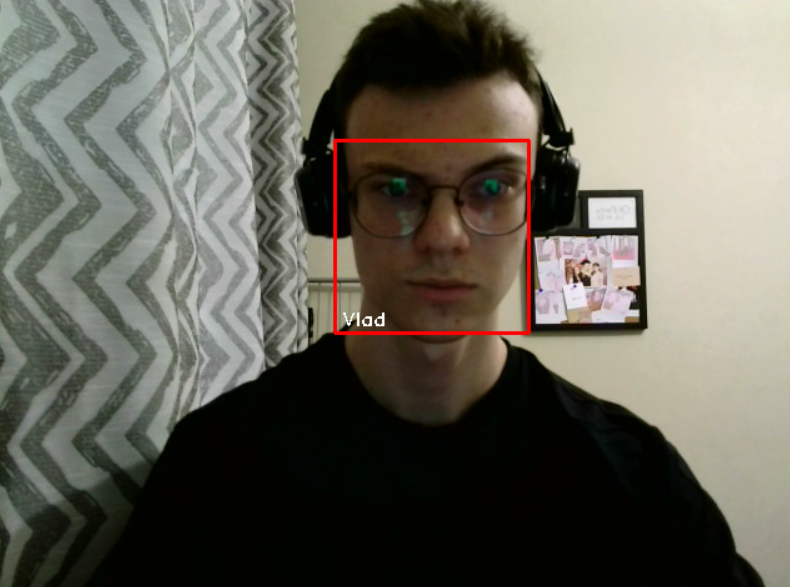

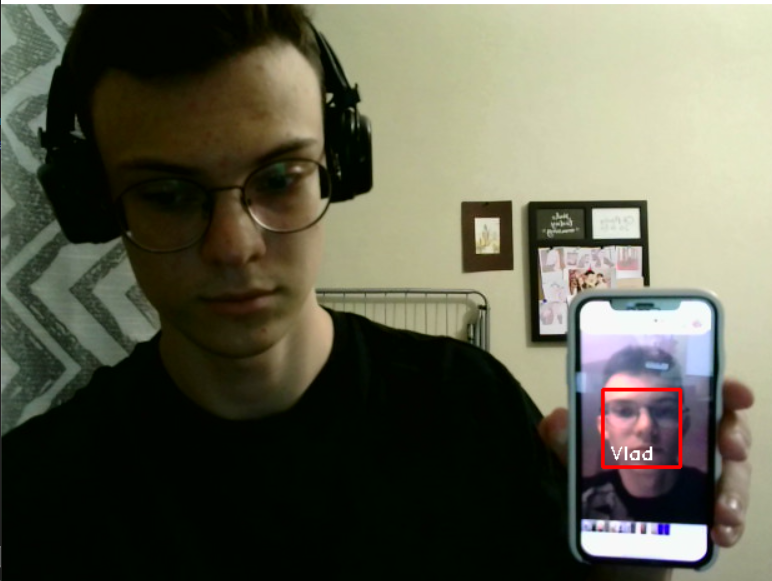

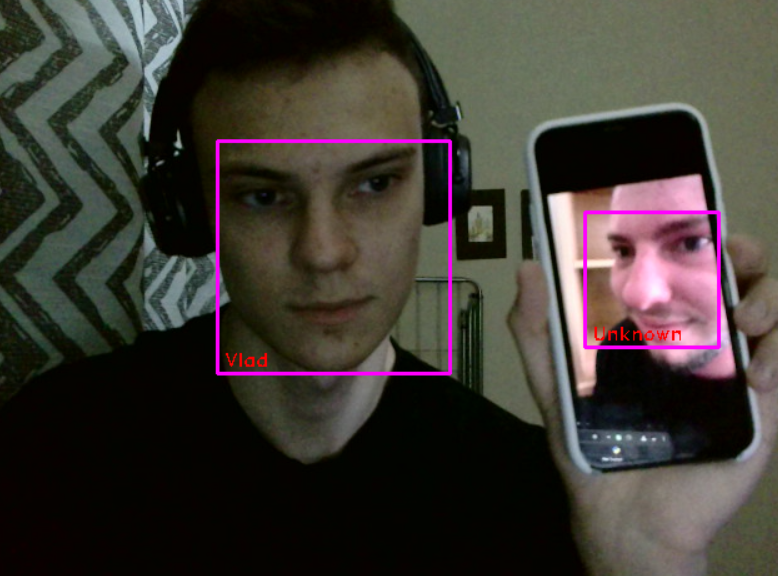

VGG-Face

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Flatten, Dense
# Загрузка модели VGG-Face
from keras.applications.vgg16 import VGG16

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt

In [ ]:
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
# Загрузка изображения лица
img_path = 'me.jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получение вектора признаков для лица
features = model.predict(x)

# Теперь вы можете использовать вектор признаков для сравнения с другими векторами
# или для классификации лиц, или для любых других задач, связанных с распознаванием лиц.


1/1 [==============================] - 2s 2s/step


In [ ]:
features.shape

(1, 4096)

1/1 [==============================] - 1s 787ms/step


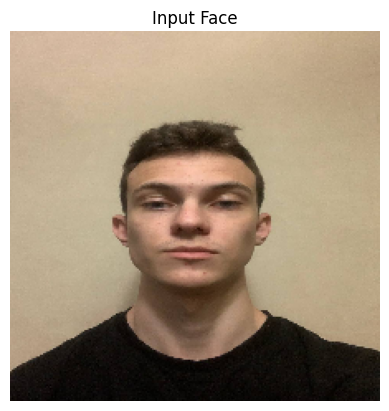

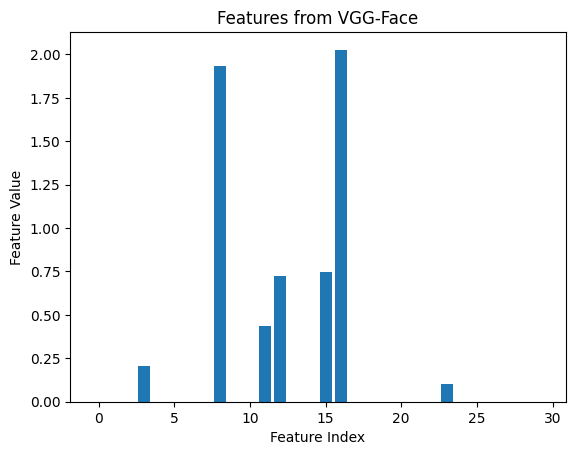

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Загрузка модели VGG-Face
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Загрузка и предварительная обработка изображения лица
img_path = 'me.jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получение вектора признаков для лица
features = model.predict(x)

# Отображение изображения
plt.imshow(img)
plt.axis('off')
plt.title('Input Face')
plt.show()

# Отображение первых 30 признаков для наглядности (вы можете отобразить больше или меньше признаков)
plt.bar(range(30), features[0][:30])
plt.title('Features from VGG-Face')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.show()


# Извлечение ROI лица с использованием OpenCV:

In [ ]:
import cv2

# Загрузите предварительно обученный каскадный классификатор лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Чтение изображения
img = cv2.imread('me_suprise.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Детекция лица
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    face_roi = img[y:y+h, x:x+w]  # извлекаем ROI лица для дальнейшего анализа


In [ ]:
face_roi

array([[[155, 184, 205],
        [153, 182, 203],
        [152, 183, 204],
        ...,
        [158, 189, 210],
        [157, 188, 209],
        [157, 188, 209]],

       [[157, 184, 205],
        [156, 185, 206],
        [153, 184, 205],
        ...,
        [160, 191, 212],
        [160, 191, 212],
        [160, 191, 212]],

       [[160, 187, 208],
        [155, 182, 203],
        [153, 182, 203],
        ...,
        [157, 188, 209],
        [157, 188, 209],
        [158, 189, 210]],

       ...,

       [[137, 161, 183],
        [137, 160, 182],
        [135, 158, 180],
        ...,
        [139, 170, 191],
        [139, 170, 191],
        [140, 171, 192]],

       [[137, 161, 183],
        [135, 158, 180],
        [133, 156, 178],
        ...,
        [136, 167, 188],
        [137, 168, 189],
        [138, 169, 190]],

       [[137, 161, 183],
        [135, 158, 180],
        [133, 156, 178],
        ...,
        [137, 168, 189],
        [138, 169, 190],
        [139, 170, 191]]

In [ ]:
face_img = cv2.resize(face_roi, (224, 224))
x = img_to_array(face_img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Извлечение дескрипторов лица
toretto_features = model.predict(x)


1/1 [==============================] - 0s 31ms/step


In [ ]:
np.save('me_sps.npy', toretto_features)


In [ ]:
# Загрузка сохраненных дескрипторов
saved_features = np.load('me_sps.npy')

In [ ]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array


# 1. Инициализация модели VGG-Face и извлечение слоя fc2
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# 2. Функция для детекции и извлечения признаков лица
def get_face_features(img_path):
    # Детекция лица с использованием OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        face_roi = img[y:y+h, x:x+w]

    face_img = cv2.resize(face_roi, (224, 224))
    x = img_to_array(face_img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features

# 3. Сравнение признаков лица
def is_match(saved_features, new_features, threshold=10):
    distance = np.linalg.norm(saved_features - new_features)
    return distance < threshold

# 4. Демонстрация функциональности
saved_features = np.load('me_sps.npy')
new_image_path = "me.jpg"  # Замените на путь к новому изображению
new_features = get_face_features(new_image_path)

if is_match(saved_features, new_features):
    print("This is Vlad!")
else:
    print("This is not Vlad.")


1/1 [==============================] - 1s 1s/step
This is not Vlad.


1/1 [==============================] - 0s 18ms/step


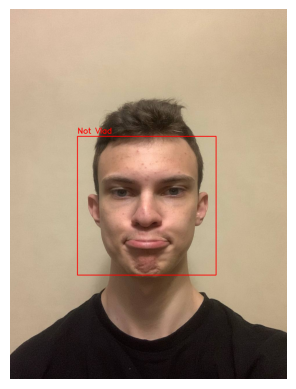

In [ ]:
def display_image_with_results(img_path, features):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        if is_match(saved_features, features):
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, "Vlad", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, "Not Vlad", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Если вы работаете в Jupyter Notebook:
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Конвертация из BGR в RGB для корректного отображения в matplotlib
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Теперь вызываем функцию:
new_image_path = "me_smile.jpg"
new_features = get_face_features(new_image_path)
display_image_with_results(new_image_path, new_features)


1/1 [==============================] - 0s 18ms/step


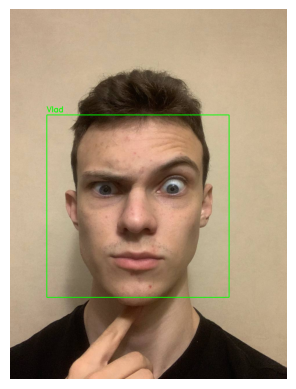

In [ ]:
# Теперь вызываем функцию:
new_image_path = "me_suprise.jpg"
new_features = get_face_features(new_image_path)
display_image_with_results(new_image_path, new_features)

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

base_model = ResNet50(include_top = False, input_shape=(224, 224, 3), pooling='avg')

def get_face_features(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_img = cv2.resize(img_rgb, (224, 224))
    face_img = np.expand_dims(face_img, axis=0)
    face_img = face_img.astype('float32')  # Преобразование в float32
    face_img = preprocess_input(face_img)  # используем version=2, т.к. это ResNet-50
    return base_model.predict(face_img)

def is_match(features1, features2, threshold=0.5):

    features1_norm = normalize(features1.reshape(1, -1))
    features2_norm = normalize(features2.reshape(1, -1))
    cosine_similarity = np.dot(features1_norm, features2_norm.T)

    return cosine_similarity > threshold

In [ ]:
def save_face_features(img_path, person_name):
    features = get_face_features(img_path)
    if features is not None:
        np.save(f'{person_name}_features.npy', features)

def load_face_features(person_name):
    return np.load(f'{person_name}_features.npy')

def display_image_with_results(img_path, features_dict):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        # Проверяем соответствие каждого дескриптора
        recognized_name = None
        for person_name, saved_features in features_dict.items():
            if is_match(saved_features, get_face_features(img_path)):
                recognized_name = person_name
                break

        if recognized_name:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, recognized_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, "Not Recognized", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Если вы работаете в Jupyter Notebook:
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
# Сохраняем дескрипторы лица с именем
person_name = 'Vlad'
save_face_features('me.jpg', person_name)


1/1 [==============================] - 1s 660ms/step


1/1 [==============================] - 0s 23ms/step


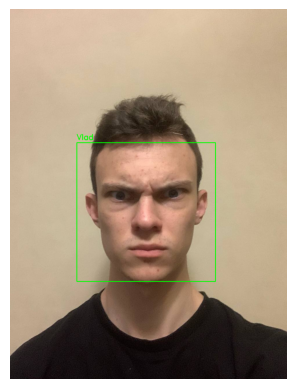

In [ ]:
# Тестирование на новом изображении
new_image_path = "me_angry.jpg"
features_dict = {person_name: load_face_features(person_name)}
display_image_with_results(new_image_path, features_dict)


1/1 [==============================] - 0s 22ms/step


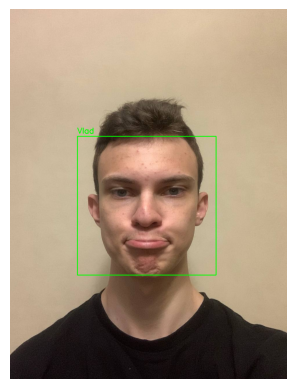

In [ ]:
new_image_path = "me_smile.jpg"
features_dict = {person_name: load_face_features(person_name)}
display_image_with_results(new_image_path, features_dict)

1/1 [==============================] - 0s 22ms/step


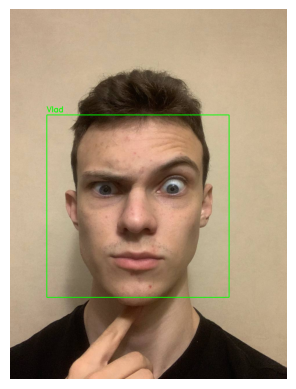

In [ ]:
new_image_path = "me_suprise.jpg"
features_dict = {person_name: load_face_features(person_name)}
display_image_with_results(new_image_path, features_dict)

1/1 [==============================] - 0s 26ms/step


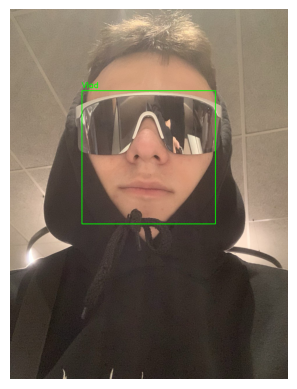

In [ ]:
new_image_path = "my.jfif"
features_dict = {person_name: load_face_features(person_name)}
display_image_with_results(new_image_path, features_dict)

1/1 [==============================] - 0s 21ms/step


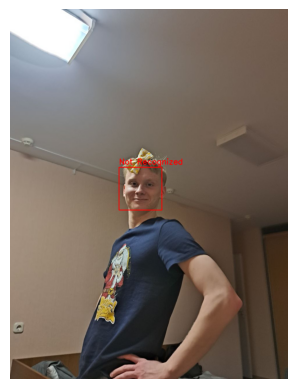

In [ ]:
new_image_path = "ivan.jpg"
features_dict = {person_name: load_face_features(person_name)}
display_image_with_results(new_image_path, features_dict)

# **Попытка перенести на видеопоток**

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import normalize
import sys
import time

base_model = ResNet50(include_top = False, input_shape=(224, 224, 3), pooling='avg')

def get_face_features(face_img):
    face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    face_img_resized = cv2.resize(face_img_rgb, (224, 224))
    face_img_resized = np.expand_dims(face_img_resized, axis=0)
    face_img_resized = face_img_resized.astype('float32')
    face_img_preprocessed = preprocess_input(face_img_resized)
    return base_model.predict(face_img_preprocessed)

def is_match(features1, features2, threshold=0.5):

    features1_norm = normalize(features1.reshape(1, -1))
    features2_norm = normalize(features2.reshape(1, -1))
    cosine_similarity = np.dot(features1_norm, features2_norm.T)

    return cosine_similarity > threshold

In [ ]:
def save_face_features(img_path, person_name):
    img = cv2.imread(img_path)  # Загружаем изображение
    features = get_face_features(img)  # Передаем загруженное изображение
    np.save(f'{person_name}_features.npy', features)


def load_face_features(person_name):
    return np.load(f'{person_name}_features.npy')

def face_detection(frame, features_dict, threshold=0.5):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    detection_faces = []
    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w]
        features = get_face_features(face_roi)

        recognized_name = None
        for person_name, saved_features in features_dict.items():
            if is_match(saved_features, features, threshold):
                recognized_name = person_name
                break

        detection_faces.append((x, y, w, h, recognized_name))

    return detection_faces


In [ ]:
def display_face_detection(frame, detection_faces):
    for (x, y, w, h, name) in detection_faces:
        if name:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
            cv2.putText(frame, "Not Recognized", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2)


In [ ]:
def face_detection_camera(features_dict, threshold=0.5):
    video_capture = cv2.VideoCapture(0)

    while True:
        ret, frame = video_capture.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)

        faces = face_detection(frame, features_dict, threshold)
        display_face_detection(frame, faces)

        cv2.imshow('Camera WS', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()


In [ ]:
def face_detection_video(video,outputPath, features_dict, threshold=25):
    cap = cv2.VideoCapture(video)
    if not cap.isOpened():
        print("Error")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames: {total_frames}")

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Используем кодек mp4
    out = cv2.VideoWriter(outputPath, fourcc, fps, (width, height))
    start_time = time.time()

    (success, image) = cap.read()
    frame_count = 0

    while success:
        frame_start_time = time.time()

       # image = cv2.resize(image, output_size)

        faces = face_detection(image, features_dict, threshold)
        display_face_detection(image, faces)

        out.write(image)
        frame_end_time = time.time()
        frame_elapsed_time = frame_end_time - frame_start_time

        sys.stdout.write(f"\rFrame {frame_count}/{total_frames}: {frame_elapsed_time:.2f} seconds")
        sys.stdout.flush()
        frame_count += 1

        (success, image) = cap.read()


    end_time = time.time()
    total_elapsed_time = end_time - start_time
    print(f"Total processing time: {total_elapsed_time/60:.2f} minutes -/ total_frames")

    cap.release()
    out.release()


In [ ]:
person_name = 'Vlad'
save_face_features('s.jpg', person_name)


1/1 [==============================] - 0s 30ms/step


In [ ]:
features_dict = {person_name: load_face_features(person_name)}

In [ ]:
face_detection_video("123.mp4", "res.mp4", features_dict)

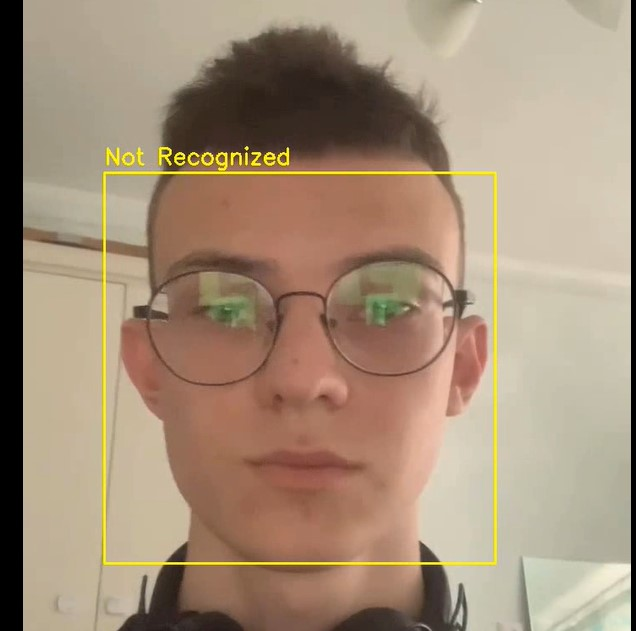

На видео не распозноет, а камера не работает(пишет ошибку)